<a href="https://colab.research.google.com/github/kimqkr4/submission/blob/main/14%EC%A3%BC%EC%B0%A8_Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

##**K-Means Clustering**

<br>

##**1. K-Means (Iterative) Algorithm**
<br>

__Step 1: Initialization__

- Select $k$ points randomly from the dataset as the initial centroids.

<br>

<center>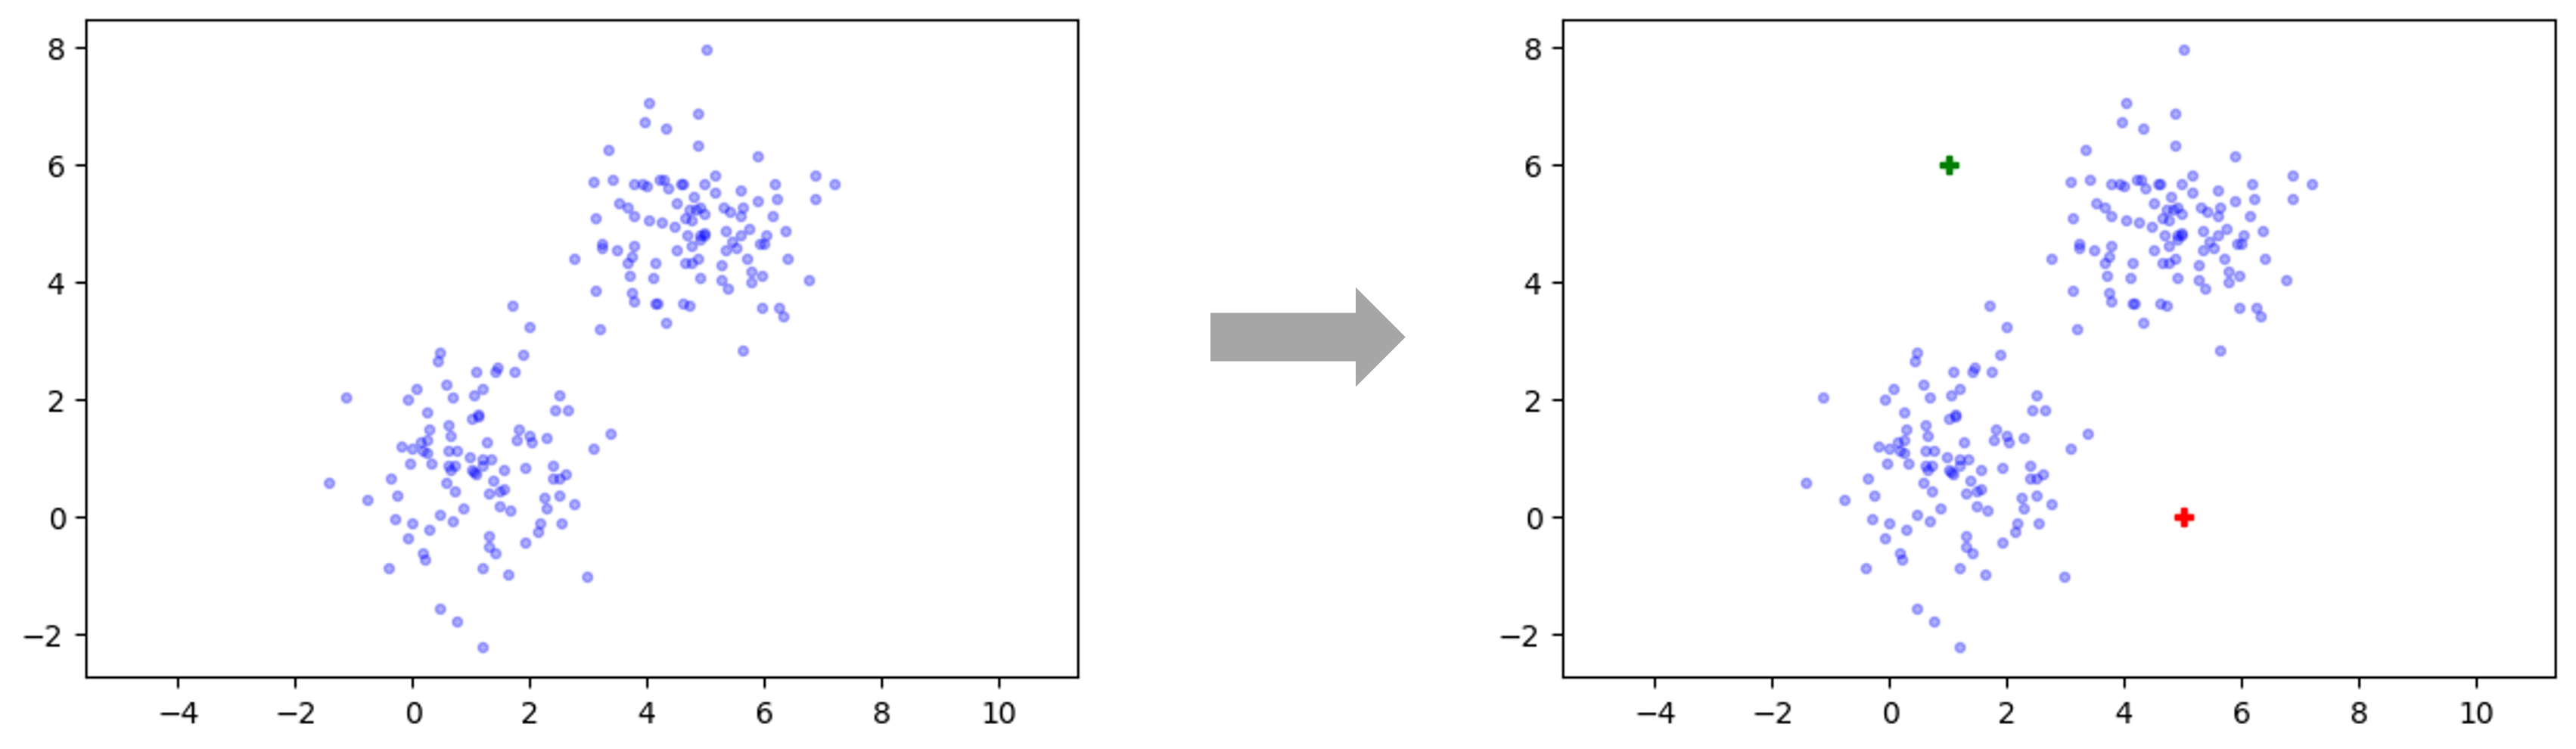</center>

<br>

**Step 2: Iterative Process**

The algorithm alternates between two key steps:

<br>

(1) Assignment Step:

For each point $x^{(i)}$, assign it to the nearest centroid:

<br>

$$\text{assign}(x^{(i)}) = \arg\min_j \|x^{(i)} - \mu_j\|^2$$

<br>

(2) Update Step:

For each cluster $j$, update the centroid to be the mean of points in that cluster:

<br>

$$\mu_j = \frac{1}{|S_j|} \sum_{x \in S_j} x$$

<br>

Where:
- $S_j$ is the set of points assigned to cluster $j$.  
- $\mu_j$ is the updated centroid.  


<br>

<center>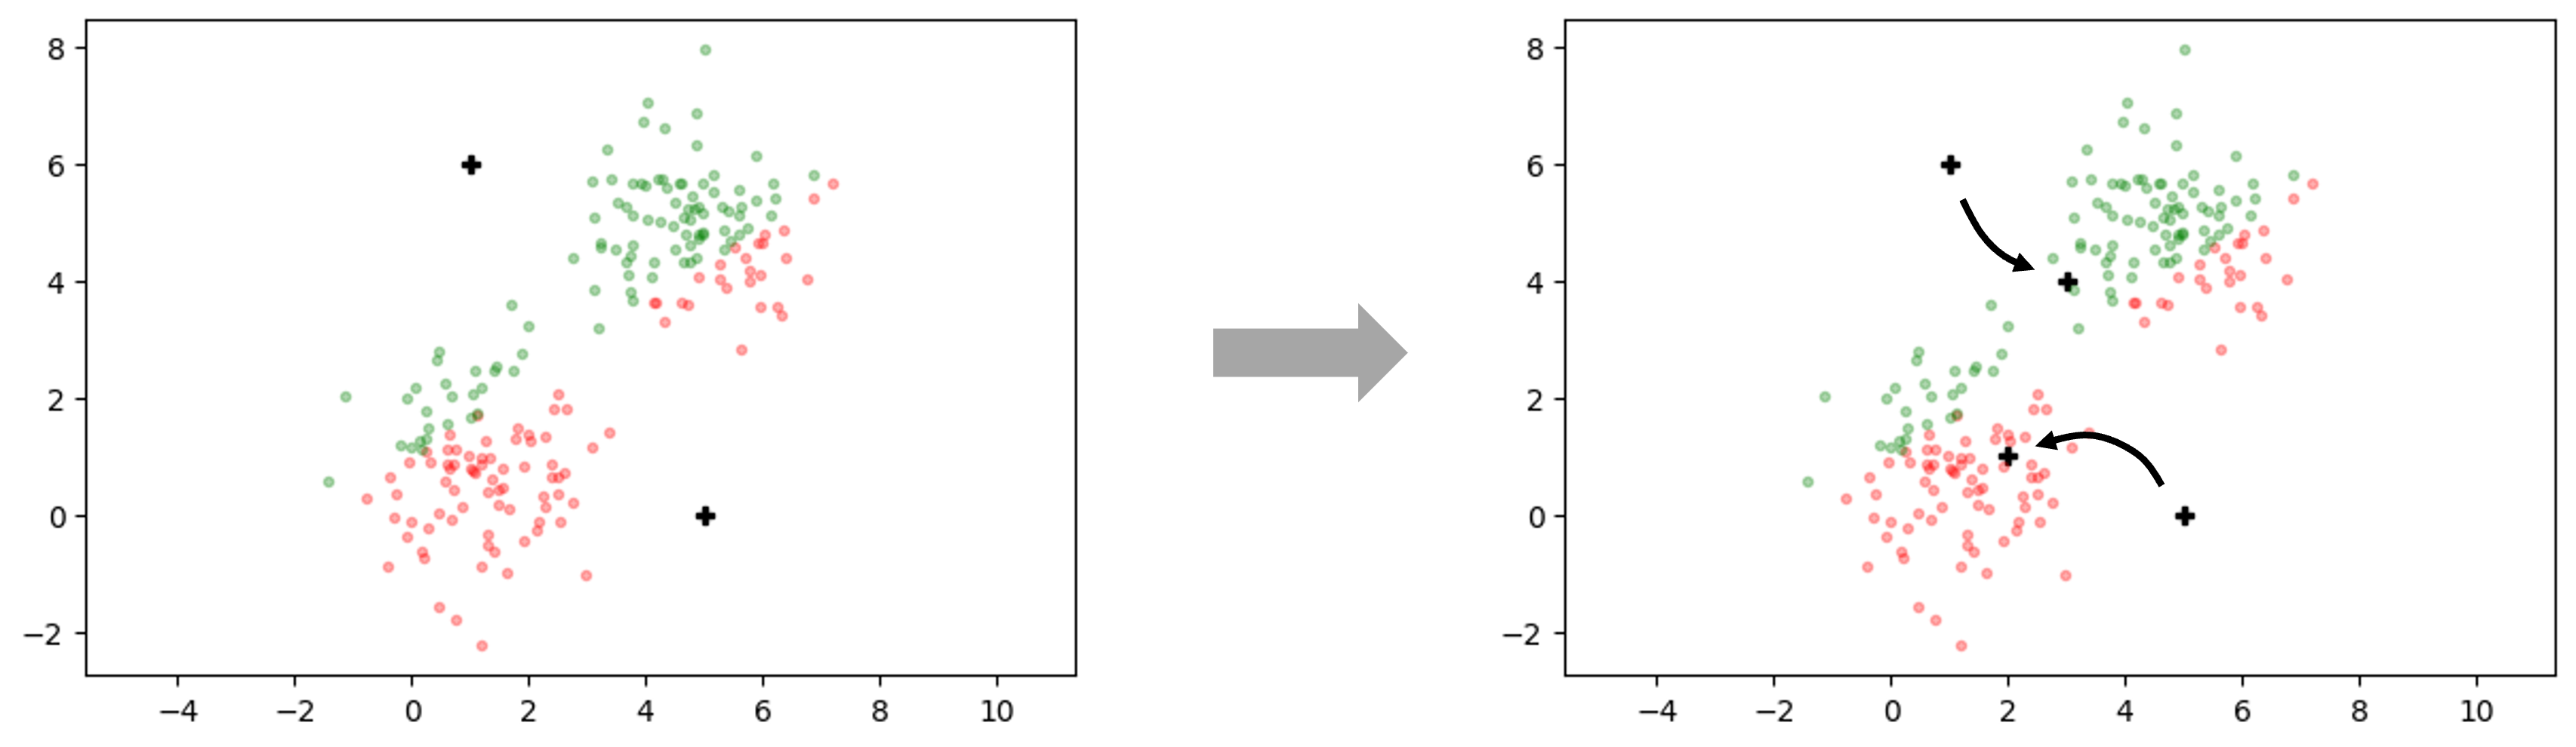</center>

__Step 3__

Repeat the Assignment and Update steps until:

- Cluster assignments no longer change, or

- The movement of centroids is below a small threshold.

<br>

Output:
- $c$ (label): index (1 to $k$) of cluster $\{c_1,c_2,\cdots,c_k\}$
- $\mu$ : averages (mean) of points assigned to cluster $\{\mu_1,\mu_2,\cdots,\mu_k\}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

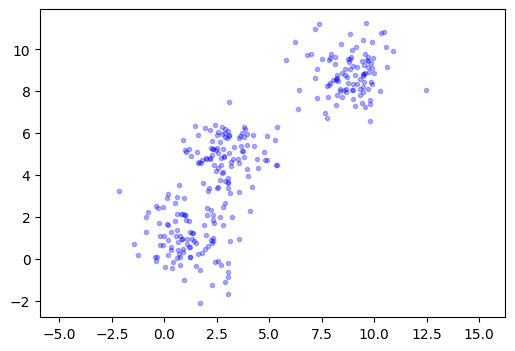

In [2]:
# data generation
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100)  # (mean, sigma, # of samples)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)

plt.figure(figsize = (6, 4))
plt.plot(X[:,0], X[:,1], 'b.', alpha = 0.3)
plt.axis('equal')
plt.show()

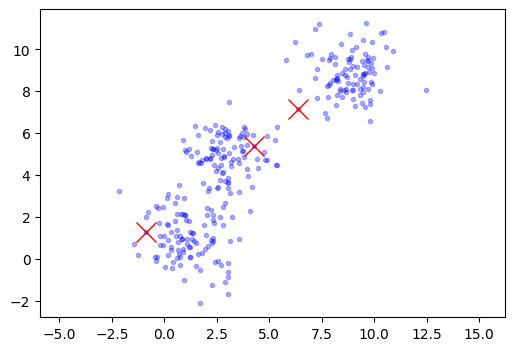

In [4]:
# The number of clusters and data
k = 3
m = X.shape[0]

mu = X[np.random.randint(0, m, k), :]
pre_mu = mu.copy()

plt.figure(figsize = (6, 4))
plt.plot(X[:,0], X[:,1], 'b.', alpha = 0.3)
plt.plot(mu[:,0], mu[:,1], 'rx', markersize = 15)
plt.axis('equal')
plt.show()

In [5]:
y = np.empty([m,1])

# Run K-means
for n_iter in range(500):
  for i in range(m):
    d0 = np.linalg.norm(X[i,:] - mu[0,:], 2)
    d1 = np.linalg.norm(X[i,:] - mu[1,:], 2)
    d2 = np.linalg.norm(X[i,:] - mu[2,:], 2)

    y[i] = np.argmin([d0, d1, d2])

  err = 0
  for i in range(k):
    mu[i,:] = np.mean(X[np.where(y==i)[0],:], axis = 0)
    err += np.linalg.norm(pre_mu[i,:] - mu[i,:], 2)

  pre_mu = mu.copy()

  if err < 1e-10:
    print("Iteration:", n_iter)
    break

Iteration: 2


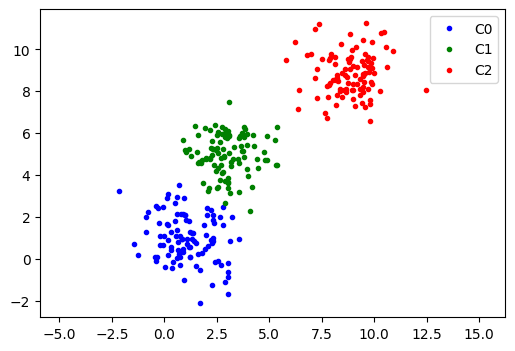

In [6]:
X0 = X[np.where(y==0)[0]]
X1 = X[np.where(y==1)[0]]
X2 = X[np.where(y==2)[0]]

plt.figure(figsize = (6, 4))
plt.plot(X0[:,0], X0[:,1], 'b.', label = 'C0')
plt.plot(X1[:,0], X1[:,1], 'g.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], 'r.', label = 'C2')
plt.axis('equal')
plt.legend()
plt.show()

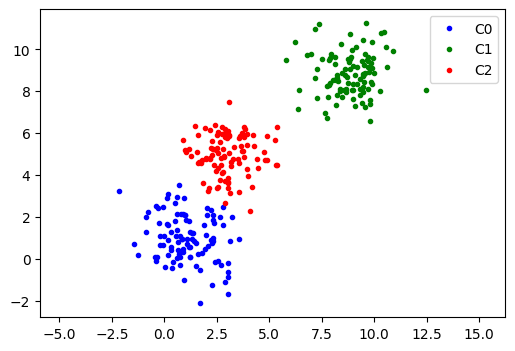

In [8]:
# use kmeans from the scikit-learn module

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(np.array(X))


plt.figure(figsize = (6, 4))
plt.plot(X[kmeans.labels_ == 0,0],X[kmeans.labels_ == 0,1], 'b.', label = 'C0')
plt.plot(X[kmeans.labels_ == 1,0],X[kmeans.labels_ == 1,1], 'g.', label = 'C1')
plt.plot(X[kmeans.labels_ == 2,0],X[kmeans.labels_ == 2,1], 'r.', label = 'C2')
plt.axis('equal')
plt.legend()
plt.show()

<br>

##**1.2. Cluster 개수 선택**

- Cluster 개수 K를 임의적으로 선택

<br>

__The Elbow Method__

- K-Means에서 최적(optimal)의 클러스터 개수 $k$를 선택하는 방법.

- $k$의 증가 --> WCSS(the within-cluster sum of squares) 감소.
  <br>

  $$\text{WCSS} = \sum_{i=1}^{m} \| x^{(i)} - \mu_{j(i)} \|^2$$

- $ \mu_{j(i)} $ 는 $ x^{(i)} $ 에 할당된 클러스터의 센트로이드(centroid)

- 최적의 $k$는 "elbow point" 지점에서 결정됨(아래 그래프에서는 $k$=3).
<br>

In [9]:
# data generation
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])

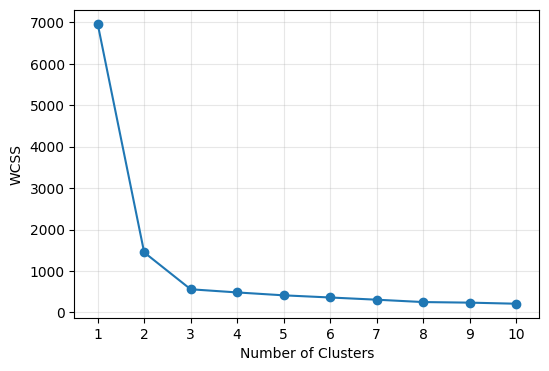

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(X)
    wcss.append(abs(kmeans.inertia_))

plt.figure(figsize = (6, 4))
plt.plot(range(1,11), wcss, 'o-')
plt.plot(2, wcss[2], 'r-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(11))
plt.xlim([0.5, 10.5])
plt.grid(alpha = 0.3)
plt.show()

# **2. K-means Clustering(예제)**


---

# **2.1. K-means Clustering Data Preparation**

[kmean _dataset.csv](https://drive.google.com/file/d/1Dy4jIcpgwhc8U47rdGj-SZlvY05T0eGc/view?usp=drive_link)



---

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


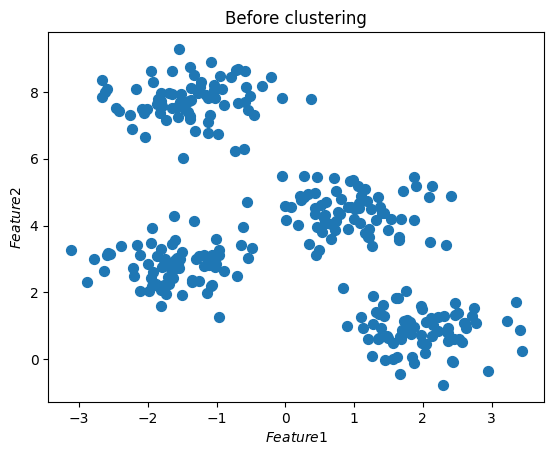

In [12]:
# Data read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Reading the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kmean_dataset.csv')
# Extracting X
X = df[['Feature1', 'Feature2']].values    # X.shape(300, 2)
N, num_features = X.shape[0], X.shape[1]
K = 4    # Number of the cluster

plt.figure(0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Before clustering")
plt.xlabel(r'$Feature1$')
plt.ylabel(r'$Feature2$')
plt.show()


# **2.2. Step 0: Initialization**

Initialize $\mu_{k}$ to zero (or random)
![](https://drive.google.com/uc?export=view&id=1toFf28kvHiAsW3MfbciaCHW360TnMXjd)

$\mu_{1} = (x_{1,1}, x_{2,1}) = (0,0)$

$\mu_{2} = (x_{1,2}, x_{2,2}) = (0,0)$

$\vdots$

$\mu_{K} = (x_{1,k}, x_{2,K}) = (0,0)$


In [13]:
def initialize_centroids(K, num_features):
    return np.zeros((K, num_features))


---
# **2.3. Step 1**: Fix the centroids ($\mu_{k}$) and find the binary indicators ($r_{n,k}$)

![](https://drive.google.com/uc?export=view&id=1r3zoW5Ib3iM5RL50UNroUl_2830o0bzV)

\begin{align}
r_{n,k} = \left\{
\begin{array}{ll}
1, & \text{if } k=\text{argmin}_{j} || X^{(n)} -\mu_{j}||^{2}\\
0, & \text{otherwise}
\end{array}
\right.
\end{align}


In [14]:
def update_cluster(X, centroids):
    # Assign clusters
    r = np.zeros((N,K)) # Initialize r as a zero matrix  (300, 4)
    distances = np.zeros((N,K))
    for i in range(N):
        for k in range(K):
            distances[i,k] = np.sum((X[i] - centroids[k])**2)
    nearest_centroid = np.argmin(distances, axis=1)
    # Assign 1 to the nearest cluster in r
    r[np.arange(N), nearest_centroid] = 1
    return r, nearest_centroid, distances


---

# **2.4. Step 2**: Fix the binary indicators ($r_{n,k}$) and find the centroids ($\mu_{k}$)

Fix $r_{n,k}$ and find $\mu_{k}$ that minimizes:
$J = \sum_{n=1}^{N} \sum_{k=1}^{K}r_{n,k}|| X^{(n)} - \mu_{k}||^{2}$,

which leads to  $\mu_{k} = \frac{\sum_{n=1}^{N}r_{n,k}X^{(n)}} {\sum_{n=1}^{N}r_{n,k}}$

![](https://drive.google.com/uc?export=view&id=1UoeeHAh_sbyPG6KkeuywouM2tN19V439)



In [15]:
def update_centroid(X, r, centroids):
    new_centroids = np.zeros((K, num_features))
    for k in range(K):
        # Check if the cluster has any points assigned
        if np.sum(r[:, k]) > 0:
            # Update centroid
            for i in range(N):
                new_centroids[k] += r[i,k]*X[i]
            new_centroids[k] /= np.sum(r[:,k])
        else:
            new_centroids[k] = centroids[k]
    return new_centroids


# **2.5. Repeat Step 1 and 2 until $J$ is converged**

**$|\frac{J^{i+1} -J^{i}}{J^{i+1}}| < \epsilon$**

$J = \sum_{n=1}^{N} \sum_{k=1}^{K}r_{n,k}|| X^{(n)} - \mu_{k}||^{2}$,


Iter : 0 J :  7535.230383923918
Iter : 1 J :  2134.73695588128
Iter : 2 J :  1400.4953466037564
Iter : 3 J :  981.4741852368517
Iter : 4 J :  790.8748934890929
Iter : 5 J :  767.9837571382335
Iter : 6 J :  731.913135136874
Iter : 7 J :  605.0565128214072
Iter : 8 J :  309.1035815713306
Iter : 9 J :  213.9549876183944
Iter : 10 J :  212.07066285197715
Iter : 11 J :  212.00599620284646


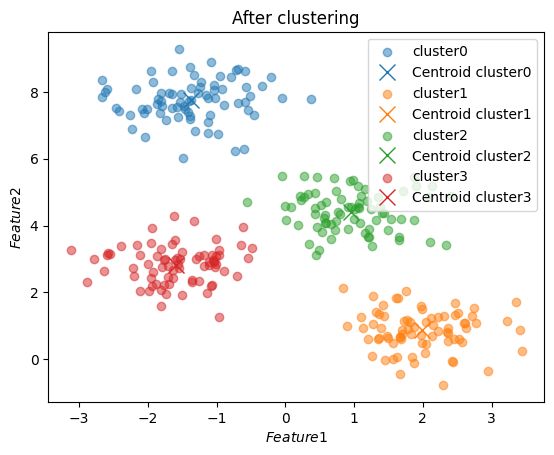

In [19]:
def kmeans(X, K, max_iters=100, epsilon=1e-6):
    N = X.shape[0]
    # Initialize the centroids to zero
    centroids = initialize_centroids(K, num_features)
    J = 1e6 # Arbitrary large number
    for iter in range(max_iters):
        r, nearest_centroid, distances = update_cluster(X,centroids)
        new_centroids = update_centroid(X, r, centroids)
        new_J = 0
        for i in range(N):
            for k in range(K):
                new_J += r[i,k]*distances[i,k]
        if np.abs((new_J - J)/new_J) < epsilon:
            break
        centroids = new_centroids
        J = new_J
        print('Iter :', iter, 'J : ', J)
    return nearest_centroid, centroids

nearest_centroid, centroids = kmeans(X, K)

plt.figure(1)
for i in range(K):
    plt.scatter(X[nearest_centroid == i, 0], X[nearest_centroid == i, 1], alpha = 0.5, label=f'cluster{i}')
    plt.plot(centroids[i, 0], centroids[i, 1], 'x', markersize=12, label=f'Centroid cluster{i}')
plt.legend()
plt.title("After clustering")
plt.xlabel(r'$Feature1$')
plt.ylabel(r'$Feature2$')
plt.show()

# **2.6. K-means clustering using numpy**

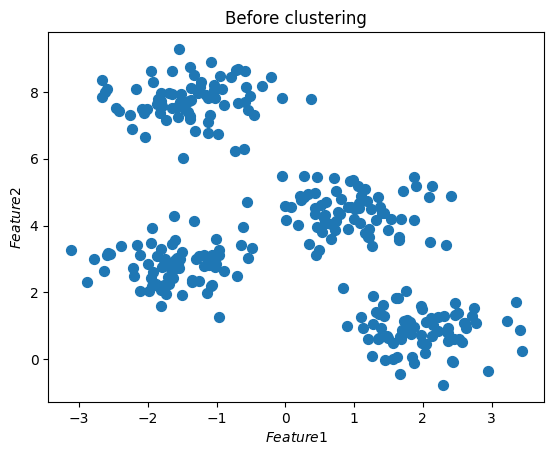

In [17]:
# Data read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Reading the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kmean_dataset.csv')
# Extracting X
X = df[['Feature1', 'Feature2']].values    # X.shape(300, 2)
N, num_features = X.shape[0], X.shape[1]
K = 4    # Number of the cluster

plt.figure(0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Before clustering")
plt.xlabel(r'$Feature1$')
plt.ylabel(r'$Feature2$')
plt.show()

Iter : 0 J :  7535.230383923918
Iter : 1 J :  2134.73695588128
Iter : 2 J :  1400.4953466037564
Iter : 3 J :  981.4741852368517
Iter : 4 J :  790.8748934890929
Iter : 5 J :  767.9837571382335
Iter : 6 J :  731.913135136874
Iter : 7 J :  605.0565128214072
Iter : 8 J :  309.1035815713306
Iter : 9 J :  213.9549876183944
Iter : 10 J :  212.07066285197715
Iter : 11 J :  212.00599620284646


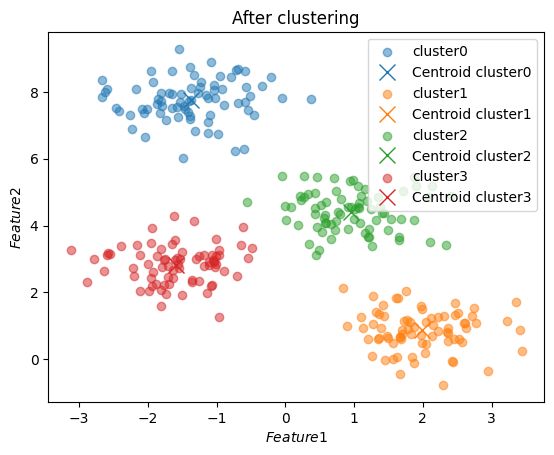

In [18]:
def initialize_centroids(K, num_features):
    return np.zeros((K, num_features))

def update_cluster(X, centroids):
    # Assign clusters
    r = np.zeros((N,K)) # Initialize r as a zero matrix  (300, 4)
    distances = np.zeros((N,K))
    for i in range(N):
        for k in range(K):
            distances[i,k] = np.sum((X[i] - centroids[k])**2)
    nearest_centroid = np.argmin(distances, axis=1)
    # Assign 1 to the nearest cluster in r
    r[np.arange(N), nearest_centroid] = 1
    return r, nearest_centroid, distances

def update_centroid(X, r, centroids):
    new_centroids = np.zeros((K, num_features))
    for k in range(K):
        # Check if the cluster has any points assigned
        if np.sum(r[:, k]) > 0:
            # Update centroid
            for i in range(N):
                new_centroids[k] += r[i,k]*X[i]
            new_centroids[k] /= np.sum(r[:,k])
        else:
            new_centroids[k] = centroids[k]
    return new_centroids

def kmeans(X, K, max_iters=100, epsilon=1e-6):
    N = X.shape[0]
    # Initialize the centroids to zero
    centroids = initialize_centroids(K, num_features)
    J = 1e6 # Arbitrary large number
    for iter in range(max_iters):
        r, nearest_centroid, distances = update_cluster(X,centroids)
        new_centroids = update_centroid(X, r, centroids)
        new_J = 0
        for i in range(N):
            for k in range(K):
                new_J += r[i,k]*distances[i,k]
        if np.abs((new_J - J)/new_J) < epsilon:
            break
        centroids = new_centroids
        J = new_J
        print('Iter :', iter, 'J : ', J)
    return nearest_centroid, centroids

nearest_centroid, centroids = kmeans(X, K)

plt.figure(1)
for i in range(K):
    plt.scatter(X[nearest_centroid == i, 0], X[nearest_centroid == i, 1], alpha = 0.5, label=f'cluster{i}')
    plt.plot(centroids[i, 0], centroids[i, 1], 'x', markersize=12, label=f'Centroid cluster{i}')
plt.legend()
plt.title("After clustering")
plt.xlabel(r'$Feature1$')
plt.ylabel(r'$Feature2$')
plt.show()


# **2.7. K-means clustering using scikit learn**

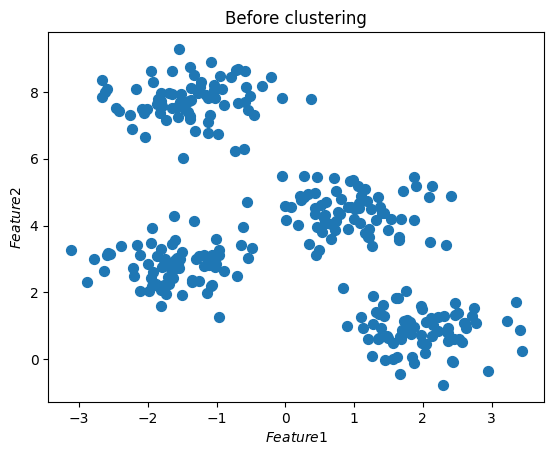

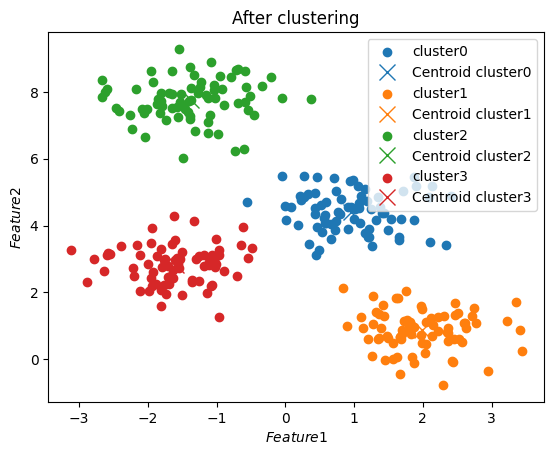

In [20]:
# K-means - scikit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Reading the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kmean_dataset.csv')
# Extracting X
X = df[['Feature1', 'Feature2']].values
N, num_features = X.shape[0], X.shape[1]
K = 4

# Using scikit-learn's KMeans
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X)

# Getting the cluster assignments and centroids
nearest_centroid = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the clusters
# Visualize the Data
plt.figure(0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Before clustering")
plt.xlabel(r'$Feature1$')
plt.ylabel(r'$Feature2$')
plt.show()

plt.figure(1)
for i in range(K):
    plt.scatter(X[nearest_centroid == i, 0], X[nearest_centroid == i, 1], label=f'cluster{i}')
    plt.plot(centroids[i, 0], centroids[i, 1], 'x', markersize=12, label=f'Centroid cluster{i}')
plt.legend()
plt.title("After clustering")
plt.xlabel(r'$Feature1$')
plt.ylabel(r'$Feature2$')
plt.show()

# **2.8. 3D-K-means clustering**


[kmean_3features_data.csv](https://drive.google.com/file/d/1g-xhmXdaeecM5Ph8Rc23i38uEbGMh3C9/view?usp=drive_link)



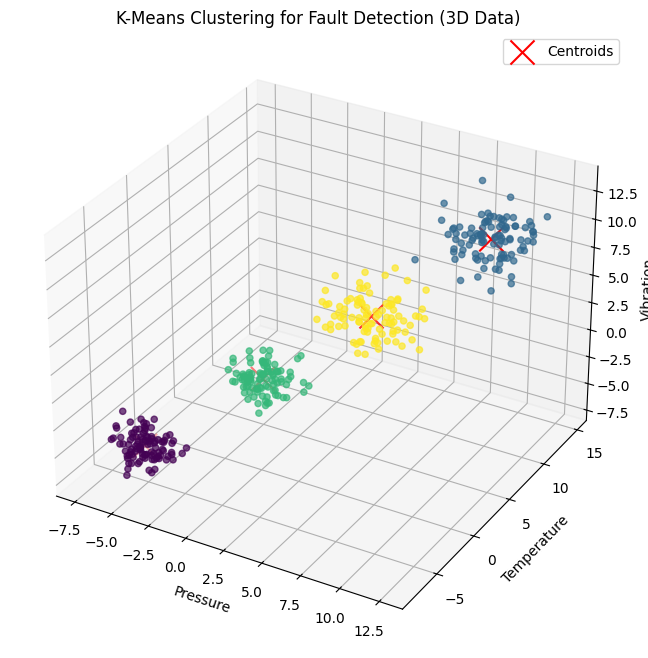

In [21]:
# 3-D K-means clustering
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reading the data from the CSV file
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/kmean_3features_data.csv'
df_read = pd.read_csv(csv_file_path)
X = df_read[['Pressure', 'Temperature','Vibration']].values

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Plotting the results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data colored by cluster label
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.7)

# Plotting the centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='x', label='Centroids')

ax.set_title('K-Means Clustering for Fault Detection (3D Data)')
ax.set_xlabel('Pressure')
ax.set_ylabel('Temperature')
ax.set_zlabel('Vibration')
ax.legend()

plt.show()

In [22]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

In [24]:
# GMM에서 사용한 시각화 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):

    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_

    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)

    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]

        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)

        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)

    if isNoise:
        legend_loc='upper center'
    else:
        legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(iris.data, columns = feature_names)
iris_df["target"] = iris.target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
from sklearn.cluster import DBSCAN

# dbscan
dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(iris.data)

# cluster label 추가
iris_df["dbscan_cluster"] = dbscan_labels

iris_df.groupby(["target", "dbscan_cluster"]).size()

target  dbscan_cluster
0       -1                 1
         0                49
1       -1                 4
         1                46
2       -1                 8
         1                42
dtype: int64

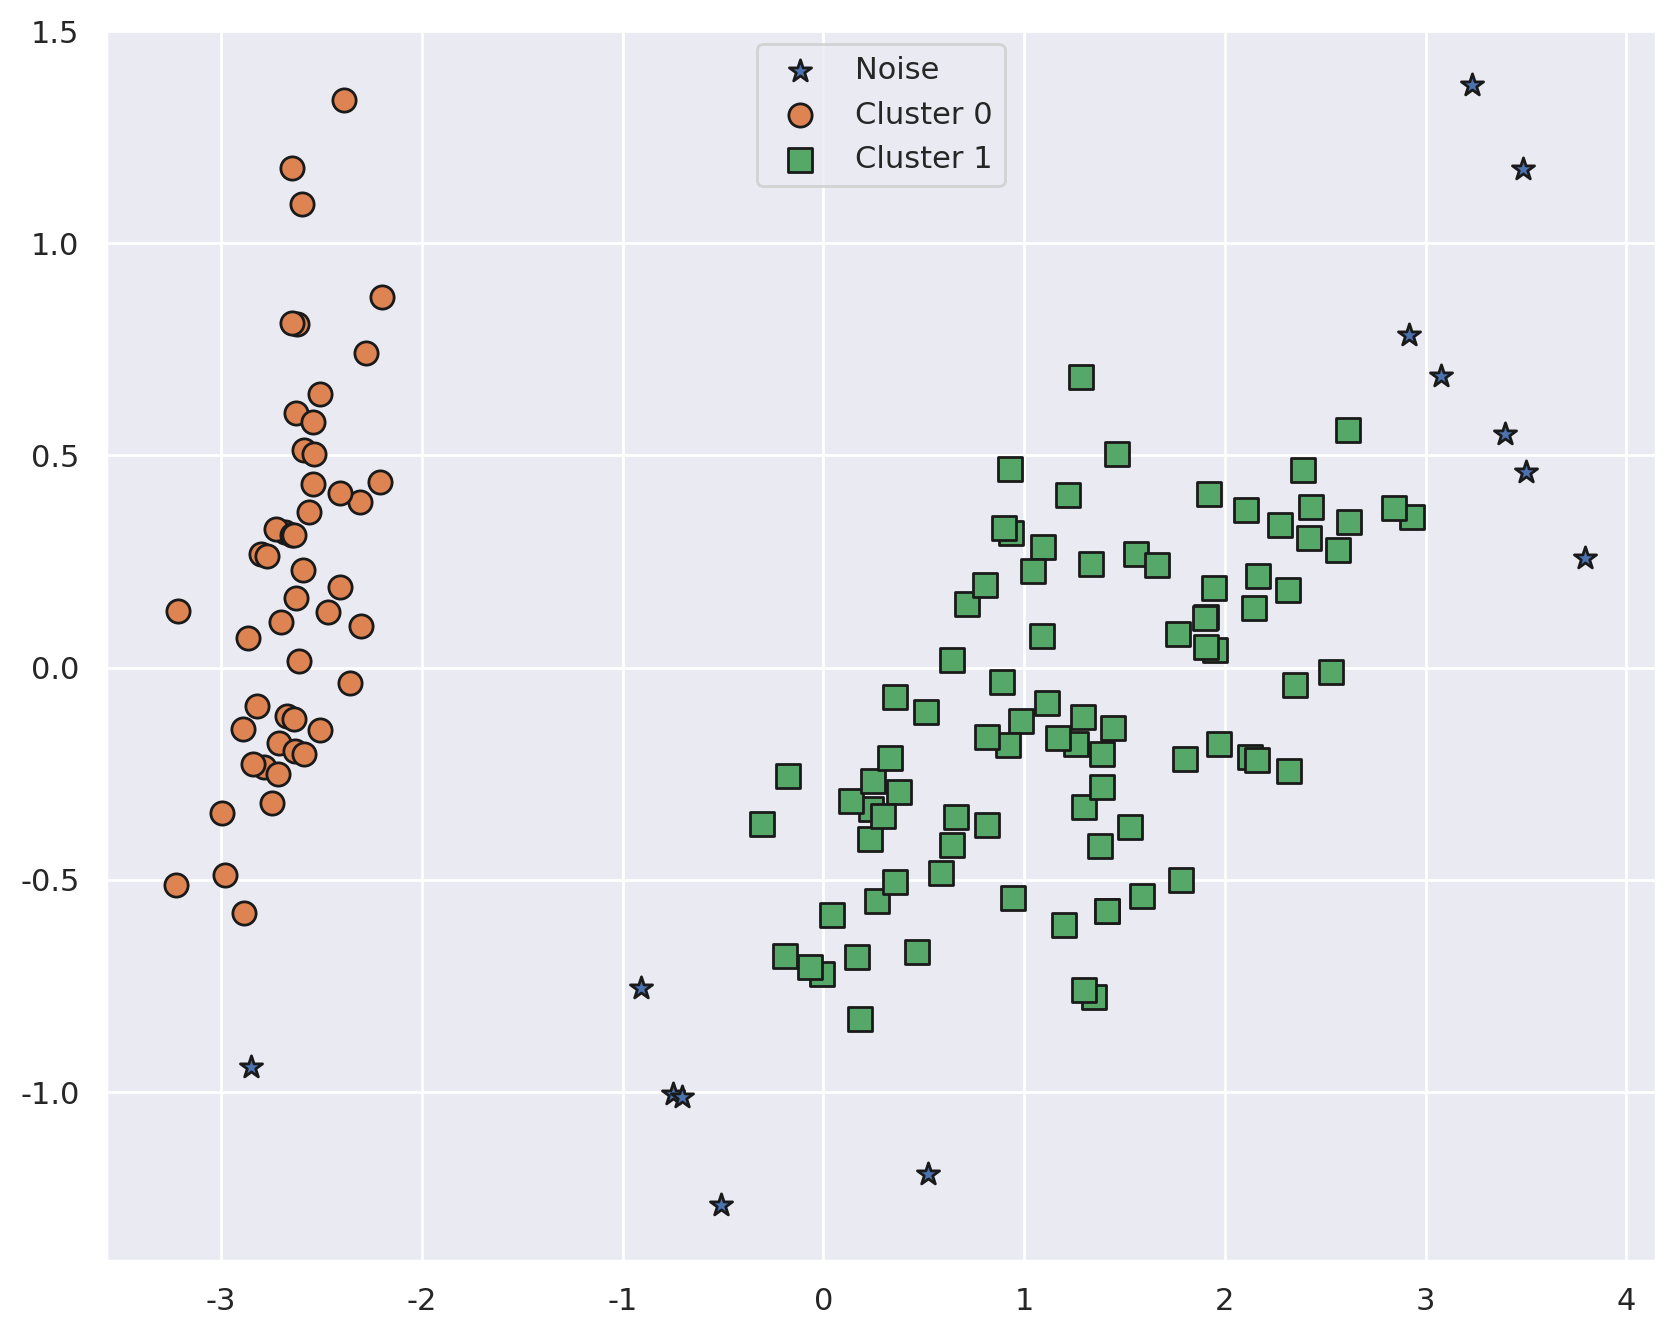

In [27]:
from sklearn.decomposition import PCA

# pca로 피처 2개만 사용
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# 데이터 프레임에 주성분 추가
iris_df["ftr1"] = pca_transformed[:,0]
iris_df["ftr2"] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, iris_df, "dbscan_cluster", iscenter=False)